Aim: Consider two data sets given i.e. Customer Behavior and House Price Prediction.

I. Find Bivariate Association between numeric variables using Covariance and Simple Correlation
for the given “House Price Prediction” Data set. Represent the results of covariance and
correlation into n*n matrices. Where n is the number of numeric variables.

II. Find Bivariate Association between categorical variable “Gender” and numerical variable
“Salary” using Point Biserial Correlation for the given Data set i.e. “Customer Behavior”.

In [23]:
import pandas as pd
# creating dataframe variable
cf = pd.read_csv("kc_house_data.csv")

In [5]:
cf

,id,price,sqft_living,floors,zipcode
0,7129300520,221900.0,1180,1.0,98178
1,6414100192,538000.0,2570,2.0,98125
2,5631500400,180000.0,770,1.0,98028
3,2487200875,604000.0,1960,1.0,98136
4,1954400510,510000.0,1680,1.0,98074
...,...,...,...,...,...
21608,263000018,360000.0,1530,3.0,98103
21609,6600060120,400000.0,2310,2.0,98146
21610,1523300141,402101.0,1020,2.0,98144
21611,291310100,400000.0,1600,2.0,98027


In [6]:
# dropping non required columns (User ID, Gender, Purchased)
df = cf.drop(labels = ["id", "floors", "zipcode"], axis = 1)

In [7]:
df

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [9]:
import matplotlib.pyplot as plt

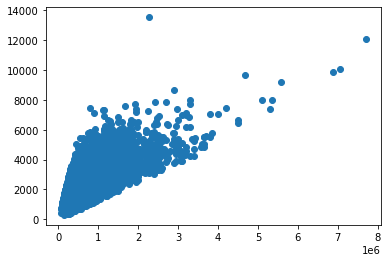

In [10]:
plt.scatter(df['price'], df['sqft_living'])
plt.show()

Before starting with the calculations, the following definations are :
Covariance :
Covariance provides insight into how two variables are related to one another. More precisely, covariance
refers to the measure of how two random variables in a data set will change together. If the covariance is
positive that means the variables are directly related or directly proportional and if the covariance is negative
that means the variables are indirectly related or inversely proportional.

Correlation :
Correlation is a statistical technique that can show whether and how strongly pairs of variables are related.

In [12]:
# length function
def getLength(q):
 l = 0
 for i in df[q]:
     l += 1

 return l

In [14]:
# mean function
def mean(q):
 a = df[q]
 s = 0
 l = 0
 for i in a:
     s += i
     l += 1

 return (s/l)

In [15]:
# Sigma function
def sigmaXY(x, y):
 a = df[x]
 b = df[y]
 s = 0
 for i in range(getLength(x)):
     s += a[i]*b[i]

 return s

In [18]:
# Covariance function
def covariance(x, y):
 a = df[x]
 l = len(a) - 1
 a_mean = mean(x)
 b = df[y]
 b_mean = mean(y)
 r = []


 for i in range(len(a)):
     k = a[i] - a_mean
     t = b[i] - b_mean
     g = k*t
     r.append(g)

 return (sum(r)/l)

In [19]:
covariance("price", "sqft_living")
# This implies that the relationship is positive.

236869900.9090375

In [20]:
# correlation function
def correlation(x, y):
 c = covariance(x, y)
 p = (df[x].var())**0.5
 q = (df[y].var())**0.5
 r = p*q

 return (c/r)

In [21]:
correlation("price", "sqft_living")


0.7020437212325263

As we can see that the Co-efficient of Covariance(Correlation) is 0.7020 in this case, therefore we can say
that the two variables (Price and Sqft_Living) here are very much directly related to each other and there is
linear relation between them.

The closer the value is to 1, the stronger and positively linear relation is seen between the varibles, and the
closer they are to 0, the relation is not linear as well as it is a very weak relationship.
This is also noted as we scatter plot both the variables.

Concluded!

Therefore, the bivariate relationship between "price" and "sqft_living" variables is Positive, Strong and Linear.


In [22]:
# Correlation Matrix for the two variables, Age and Salary
df.corr()

,price,sqft_living
price,1.000000,0.702044
sqft_living,0.702044,1.000000


CONCLUSION : The bivariate association between the two variables here "price" and "sqft_living" is Positive,Strong and Linear.
--



























QUESTION-02
--


In [26]:
tf = pd.read_csv("Customer_Behaviour.csv")
tf = tf.drop(labels = ["User ID", "Age", "Purchased"], axis = 1)

In [27]:
tf

,Gender,Salary
0,Male,19000
1,Male,20000
2,Female,43000
3,Female,57000
4,Male,76000
...,...,...
395,Female,41000
396,Male,23000
397,Female,20000
398,Male,33000


In [28]:
# The Numerical Variable here is "Salary" and Categorical Variable is "Gender".
# Formula :
# r = (mean(x1) - mean(x0))/S X (x0*x1)**0.5

In [30]:
# Mean of Gender Entities(Male/Female)
def meanGender(x):
 a = tf["Gender"]
 b = tf["Salary"]

 s = 0
 l = 0

 for i in range(len(a)):
     if a[i] == x:
         s += b[i]
         l += 1
 return (s/l)

In [37]:
def proportion(x):
 a = tf["Gender"]

 l = len(a)

 c = 0

 for i in a:
     if i == x:
         c += 1

 return (c/l)

In [38]:
def sd(x):
 a = tf[x]

 v = a.var()


 return v**0.5

In [39]:
# 1 --> Male
# 0 --> Female
x1_mean = meanGender("Male")
x0_mean = meanGender("Female")
print(x1_mean)
print(x0_mean)

67642.85714285714
71759.80392156863


In [40]:
x1 = proportion("Male")
x0 = proportion("Female")
print(x1)
print(x0)

0.49
0.51


In [41]:
# Standard Deviation
S = sd("Salary")
print(S)

34096.960282424785


In [43]:
k = x1_mean - x0_mean
g = k/S
an = x1*x0
ak = an**0.5
print("Point Biserial Correlation Value : ",g*ak)

Point Biserial Correlation Value :  -0.06035909466571985


The Negative Value of Point Biserial Correlation clearly indicates that there is negative relation between the
variables here "Gender" and "Salary".

Also the value is closer to 0, that means it is Weak Relation.

Therefore, the relationship between the variables here "Gender" and "Salary" is Negative and Weak.

CONCLUSION : The relationship between the variables here "Gender" and "Salary" is Negative and Weak.
--
